$$ E_{f} = 27600\\
E_{m} = 290\\
\\
V_{m} = 0.34\\
V_{f} = 0.66\\
\\
\alpha_{f} = 0.000005\\
\alpha_{m} = 0.000063\\
\\
\nu_{f} = 0.3\\
\nu_{m} = 0.3\\
\\
\rho_{f} = 0.0025\\
\rho_{m} = 0.0012\\
\\
\sigma_{bf}^+ = 85\\
\sigma_{bm}^+ = 3.4\\
\\
\beta_{f} = 0\\
\beta_{m} = 0.33\\$$

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

ef = 27600
em = 290

vm = 0.34
vf = 0.66

alphaf = 0.000005
alpham = 0.000063

nuf = 0.3
num = 0.3

rhof = 0.0025
rhom = 0.0012

sigbf = 85
sigbm = 3.4

betaf = 0
betam = 0.33

$$ E_{1} = V_{f}*E_{f} + (1-V_{f})*E_{m} $$

In [2]:
def E1(vf):
    return vf*ef+(1-vf)*em

$$ E_{2} = \frac{E_{m}*E_{f}}{(V_{f}*E_{m}+V_{m}*E_{f})} $$

In [3]:
def E2(vf, vm):
    return em*ef/(vf*em+vm*ef)
    #return em/(1-vf*(1-(em/ef)))

$$ \alpha_{1} = \frac{(V_{f}*\alpha_{f}*E_{f} + V_{m}*\alpha_{m}*E_{m})}{(V_{f}*E_{f} + V_{m}*E_{m})} $$

In [4]:
def Alpha1(vf, vm):
    return (vf*alphaf*ef + vm*alpham*em)/(vf*ef + vm*em)

$$ \alpha_{2} = V_{f}*\alpha_{f} + V_{m}*\alpha_{m} + \frac{(V_{m}*E_{f} - V_{f}*E_{m})*(\alpha_{m} - \alpha_{f})}{(\frac{E_{f}}{V_{m}} + \frac{E_{m}}{V_{f}})} $$

In [5]:
def Alpha2(vf, vm):
    return (vf*alphaf + vm*alpham +
            (vm*ef - vf*em)*(alpham - alphaf)/
            ((ef/vm + em/vf)))

$$ \nu_{12} = V_{f}*\nu_{f} + V_{m}*\nu_{m} $$

In [6]:
def Nu12(vf, vm):
    return vf*nuf + vm*num

$$ \rho = V_{f}*\rho_{f} + V_{m}*\rho_{m} $$

In [7]:
def Rho(vf, vm):
    return vf*rhof + vm*rhom

$$ \sigma_{b1}^+ = V_{f}*\sigma_{bf}^+ + V_{m}*\sigma_{bm}^+ $$

In [8]:
def Sigb1(vf, vm):
    return vf*sigbf + vm*sigbm

$$ \beta_{1} = \frac{(\beta_{f}*\Delta C_{f}*V_{f}*E_{f} + \beta_{m}*\Delta C_{m}*B_{m}*E_{m})}{E_{1}*(\Delta C_{f}*\rho_{f}*V_{f} + \Delta C_{m}*\rho_{m}*V_{m})}*\rho\\
\Delta C_{f} = 0\\
=> \beta_{1} = (\frac{E_{m}}{E_{1}})*(\frac{\rho}{\rho_{m}})*\beta_{m}$$

In [9]:
def Beta1(em, e1, rho): #delta_cf, delta_cm, vf, vm, ef, em):
    return (em/e1)*(rho/rhom)*betam
    #return (betaf*delta_cf*vf*ef +
    #        betam*delta_cm*vm*em)*Rho(vf, vm)/
#(E1(vf)*(delta_cf*phof*vf + delta_cm*rhom*vm))

$$ \beta_{2} = \frac{((V_{f}*(1 + \nu_{f})*\Delta C_{f}*\beta_{f} + V_{m}*(1 + \nu_{m})*\Delta C_{m}*\beta_{m})}{(V_{m}*\rho_{m}*\Delta C_{m} + V_{f}*\rho_{f}*\Delta C_{f}))}*\rho-\beta_{1}*\nu_{12}\\
\Delta C_{f} = 0\\
=> \beta_{2} = (1+\nu_{m})*(\frac{\rho}{\rho_{m}})*\beta_{m} - \beta_{1}*\nu_{12} $$

In [10]:
def Beta2(beta1, nu12): #delta_cf, delta_cm, vf, vm, ef, em):
    return (1+num)*(rho/rhom)*betam - beta1*nu12
    #return ((vf*(1 + nuf)*delta_cf*betaf 
    #         + vm*(1 + num)*delta_cm*betam)*Rho(vf, vm)/
    #        (vm*rhom*delta_cm + vf*rhof*delta_cf))-
#Beta1(delta_cf, delta_cf, vf, vm, ef, em)*Nu12(vf, vm)

$$ E_{1} = 18314.6 $$

In [11]:
e1 = E1(vf)
#print(e1)

$$ E_{2} = 835.8919731812771 $$

In [12]:
e2 = E2(vf, vm)
#print(e2)

$$ \alpha_{1} = 5.312253611872497*10^{-6} $$

In [13]:
alpha1 = Alpha1(vf, vm)
#print(alpha1)

$$ \alpha_{2} = 3.1252685809135886*10^{-5} $$

In [14]:
alpha2 = Alpha2(vf, vm)
#print(alpha2)

$$ \nu_{12} = 0.3 $$

In [15]:
nu12 = Nu12(vf, vm)
#print(nu12)

$$ \sigma_{b1} = 57.256 $$

In [16]:
sigb1 = Sigb1(vf, vm)
#print(sigb1)

$$ V_{f_{lst}} = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] $$

In [17]:
vf_lst = [i/10 for i in range(0, 11)]
#print(vf_lst)

$$ V_{m_{lst}} = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0] $$

In [18]:
vm_lst = [vf_lst[i] for i in range(10, -1, -1)]
#print(vm_lst)

$$ E_{1_{lst}} = [290.0, 3021.0, 5752.0, 8483.0, 11214.0, 13945.0, 16676.0, 19407.0, 22138.0, 24869.0, 27600.0] $$

In [19]:
e1_lst = [E1(vf_lst[i]) for i in range(0,11)]
#print(e1_lst)

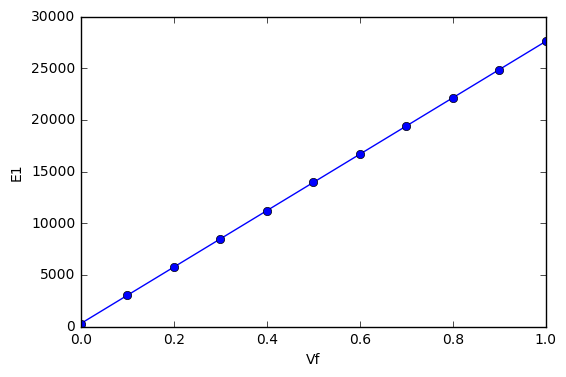

In [20]:
plt.plot(vf_lst, e1_lst, marker="o")
plt.xlabel("Vf")
plt.ylabel("E1")

$$ E_{2_{lst}} = [290.0, 321.84647553178655, 361.55027554431297, 412.42850517854384, 479.97121611897336, 573.9691645751166, 713.7506688068486, 943.5341270776847, 1391.5159944367176, 2649.453823237339, 27600.0] $$

In [21]:
e2_lst = [E2(vf_lst[i], vm_lst[i]) for i in range(0, 11)]
#print(e2_lst)

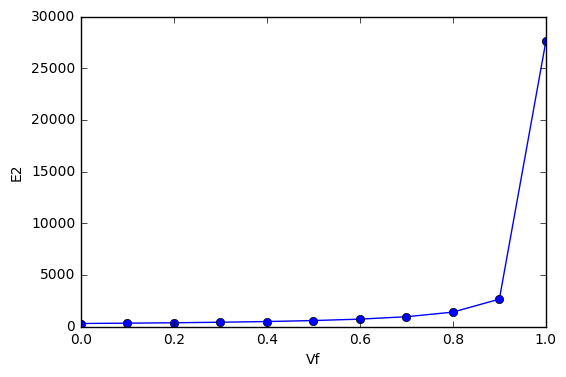

In [22]:
plt.plot(vf_lst, e2_lst, marker="o")
plt.xlabel("Vf")
plt.ylabel("E2")

$$ \nu_{12_{lst}} = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3] $$

In [23]:
nu12_lst = [Nu12(vf_lst[i], vm_lst[i]) for i in range(0, 11)]
#print(nu12_lst)

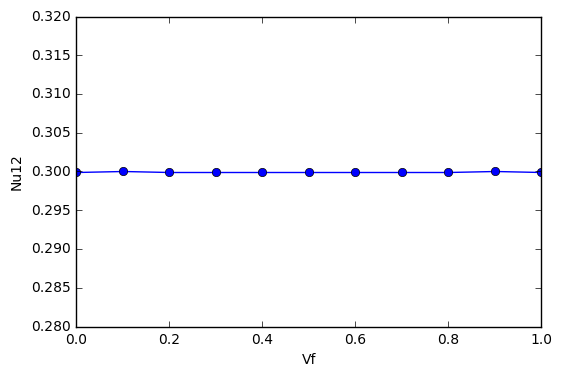

In [24]:
plt.plot(vf_lst, nu12_lst, marker="o")
plt.xlabel("Vf")
plt.ylabel("Nu12")

$$ \alpha_{1_{lst}} = [6.3*10^{-5}, 1.0010923535253227*10^{-5}, 7.339360222531294*10^{-6},\\ 
6.387952375338913*10^{-6}, 5.899946495452113*10^{-6}, 5.603083542488348*10^{-6}, \\
5.403454065723195*10^{-6}, 5.2600092750038645*10^{-6}, \\
5.1519559129099295*10^{-6}, 5.067634404278419*10^{-6}, 5*10^{-6}] $$

In [25]:
alpha1_lst = [Alpha1(vf_lst[i], vm_lst[i]) for i in range(0, 11)]
#print(alpha1_lst)

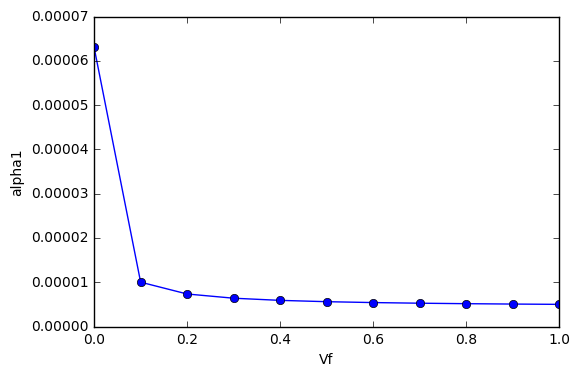

In [26]:
plt.plot(vf_lst, alpha1_lst, marker="o")
plt.xlabel("Vf")
plt.ylabel("alpha1")

$$ \alpha_{2_{lst}} = [0.00010007104270109236, 8.692923504867873*10^{-5}, 7.321498762230343*10^{-5},\\
6.02120278223649*10^{-5}, 4.8198458228755824*10{-5}, 3.727020388582394*10^{-5},\\
2.7469194620497758*10^{-5}, 1.8816669979221252*10^{-5}, 1.1324539788491698*10^{-5}] $$

In [27]:
alpha2_lst = [Alpha2(vf_lst[i], vm_lst[i]) for i in range(1, 10)]
#print(alpha2_lst)

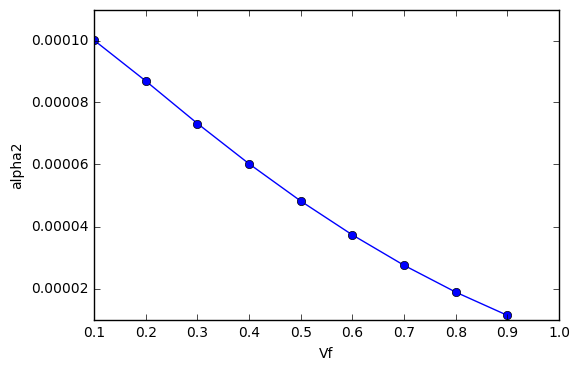

In [28]:
plt.plot(vf_lst[1:10], alpha2_lst, marker="o")
plt.xlabel("Vf")
plt.ylabel("alpha2")

$$ \rho = 0.002058 $$

In [29]:
rho = Rho(vf, vm)
#print(rho)

$$ \beta_{1} = 0.008961456979677419 $$

In [30]:
beta1 = Beta1(em, e1, rho)
#print(beta1)

$$ \beta_{2} = 0.733046562906097 $$

In [31]:
beta2 = Beta2(beta1, nu12)
#print(beta2)